In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\sastihasini\Documents\mental health tracker\cleaned_emotion_dataset.csv")

print(df.head())


                                             Comment Emotion  \
0  i seriously hate one subject to death but now ...    fear   
1                 im so full of life i feel appalled   anger   
2  i sit here to write i start to dig out my feel...    fear   
3  ive been really angry with r and i feel like a...     joy   
4  i feel suspicious if there is no one outside l...    fear   

                                          clean_text  encoded_label  
0  seriously hate one subject death feel reluctan...              1  
1                         im full life feel appalled              0  
2  sit write start dig feeling think afraid accep...              1  
3  ive really angry r feel like idiot trusting fi...              2  
4  feel suspicious one outside like rapture happe...              1  


In [5]:
from sklearn.model_selection import train_test_split
X = df["clean_text"]
y = df["encoded_label"]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.936026936026936
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       392
           1       0.96      0.91      0.94       416
           2       0.92      0.96      0.94       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



In [8]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [9]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 145.2 kB/s eta 0:04:32
   ---------------------------------------- 0.0/39.5 MB 145.2 kB/s eta 0:04:32
   ---------------------------------------- 0.0/39.5 MB 140.3 kB/s eta 0:04:42
   ---------------------------------------- 0.0/39.5 MB 140.3 kB/s eta 0:04:42
   ---------------------------------------- 0.1/39.5 MB 163.6 kB/s eta 0:04:02
   ---------------------------------------- 0.1/39.5 MB 170.7 kB/s eta 0:03:51
   ---------------------------------------- 0.1/39.5 MB 170.7 kB/s eta 0:03:51
   ---------------------------------------- 0.1/39.5 MB 170.7 kB/s eta 0:03:51
   -------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import cv2
import matplotlib.pyplot as plt

# Initialize the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Could not open webcam")
else:
    ret, frame = cap.read()  # Capture a single frame
    cap.release()  # Release the webcam

    if ret:
        # Convert the frame from BGR (OpenCV default) to RGB (Matplotlib default)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8,6))
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.title("Captured Image from Webcam")
        plt.show()
    else:
        print("Failed to capture image")


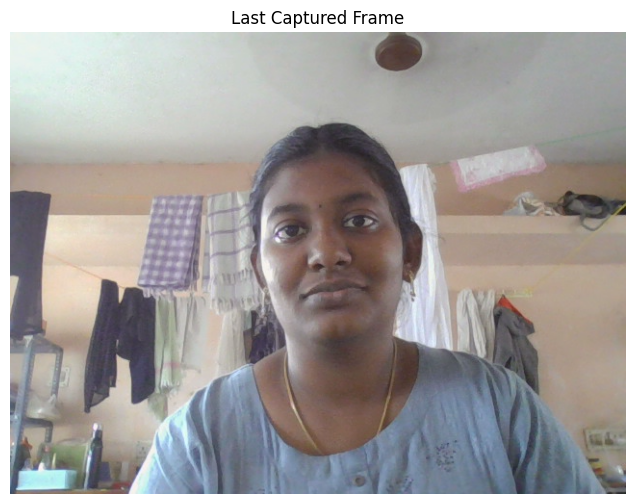

In [31]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Could not open webcam")
else:
    frame_count = 0
    max_frames = 50  # Capture 50 frames and then stop
    frames = []
    
    while frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
        frame_count += 1

    cap.release()
    
    # Display the last captured frame inline
    frame_rgb = cv2.cvtColor(frames[-1], cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(frame_rgb)
    plt.axis("off")
    plt.title("Last Captured Frame")
    plt.show()
